In [2]:
from bs4 import BeautifulSoup
from urllib2 import urlopen

bs=BeautifulSoup(urlopen('http://www.dorh.hr/Default.aspx?sec=56'),'lxml')

In [35]:
from dateutil.parser import parse

def parsePage(page):
    bs=BeautifulSoup(urlopen('http://www.dorh.hr'+page),'lxml')
    a=bs.find(class_='Lead')
    if a.string == None:
        a=a.contents[0]    
    d=a.string.strip()
    i=d.rfind('(')
    try:
        dt=parse(d[i+1:-1].replace(' ',''))
    except ValueError:
        print d
        return ''
    
    return dt
    
    
parsePage('/24062014')

datetime.datetime(2014, 6, 24, 0, 0)

In [36]:
res={}
for h in bs.findAll(class_='ArticleHeading'):
    a=h.a
    l=a['href']
    t=a.contents[0]
    if(t.name == 'p'):
        t=t.contents[0]
    if(t.startswith('Podignuta')):
        dt=parsePage(l)
        res[t]=dt

        print t+" >> "+str(dt)

Podignuta optužnica protiv petero okrivljenika >> 2015-08-07 00:00:00
Podignuta optužnica protiv devetero okrivljenika >> 2015-01-07 00:00:00
Podignuta optužnica protiv trojice okrivljenika >> 2015-06-18 00:00:00
Podignuta optužnica protiv 10 okrivljenika >> 2015-11-06 00:00:00
Podignuta optužnica protiv osmoro okrivljenika >> 2015-11-06 00:00:00
Podignuta optužnica protiv 13 okrivljenika >> 2015-05-06 00:00:00
Podignuta optužnica protiv gradonačelnika Zagreba i dvoje okrivljenika >> 2015-03-06 00:00:00
Podignuta optužnica protiv petorice okrivljenika >> 2015-02-06 00:00:00
Podignuta optužnica protiv šestoro okrivljenika i jednog trgovačkog društva >> 2015-02-06 00:00:00
Podignuta optužnica protiv 11 okrivljenika >> 2015-05-22 00:00:00
Podignuta optužnica protiv šestoro okrivljenika >> 2015-05-18 00:00:00
Podignuta optužnica protiv četvorice okrivljenika >> 2015-06-05 00:00:00
Podignuta optužnica protiv petoro okrivljenika >> 2015-04-28 00:00:00
Podignuta optužnica protiv gradonačelnik

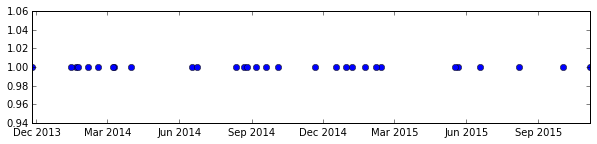

In [45]:
import matplotlib
import matplotlib.pyplot as P
import numpy
%matplotlib inline

dates = matplotlib.dates.date2num(res.values())
P.figure(figsize=(15,2))
P.plot_date(dates,numpy.ones(len(res)))
